In [1]:
import pandas as pd

ccba = pd.read_csv('Dataset/public_train_x_ccba_full_hashed.csv')
cdtx = pd.read_csv('Dataset/public_train_x_cdtx0001_full_hashed.csv')
custinfo = pd.read_csv('Dataset/public_train_x_custinfo_full_hashed.csv')
dp = pd.read_csv('Dataset/public_train_x_dp_full_hashed.csv')
remit = pd.read_csv('Dataset/public_train_x_remit1_full_hashed.csv')
public_alert_date = pd.read_csv('Dataset/public_x_alert_date.csv')
train_alert_date = pd.read_csv('Dataset/train_x_alert_date.csv')
train_y_answer = pd.read_csv('Dataset/train_y_answer.csv')
sample = pd.read_csv('Dataset/sample_submission.csv')

## Preprocess

In [2]:
import pickle
import numpy as np
import pandas as pd

In [3]:
#combine customer info with dates
date = pd.concat([public_alert_date, train_alert_date], axis=0)
custinfo = custinfo.merge(date, on='alert_key', how='left')
custinfo = custinfo.merge(train_y_answer, on='alert_key', how='left')
custinfo

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN
...,...,...,...,...,...,...,...,...
25746,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0.0
25747,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0.0
25748,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0.0
25749,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0.0


In [4]:
# functions for cleaning up data depending on numerical or categorical

def process_numerical(col):
    col = np.nan_to_num(col, nan=0)
    return col

def process_categorical(col):
    col.fillna('NULL', inplace=True)
    map_dict = {v:i for i, v in enumerate(set(col.unique()))}
    col = col.map(map_dict)
    return col

In [5]:
#cleanup ccba
cols = ccba.columns 
numericals = []
numericals.extend([cols[1],cols[3],cols[4],cols[5],cols[6],cols[7],cols[8],cols[9]])

ccba[numericals] = process_numerical(ccba[numericals].copy())
ccba['data_source'] = 'ccba'

In [6]:
#cleanup cdtx
cdtx = pd.read_csv('Dataset/public_train_x_cdtx0001_full_hashed.csv')
cols = cdtx.columns
numericals = []
categoricals = []
numericals.append(cols[4])
categoricals.extend([cols[2],cols[3]])

cdtx[numericals] = process_numerical(cdtx[numericals].copy())
for category in categoricals:
    cdtx[category] = process_categorical(cdtx[category].copy())
cdtx['data_source'] = 'cdtx'

In [7]:
#cleanup dp
cols = dp.columns
numericals = []
categoricals = []
numericals.extend([cols[5],cols[6]])
categoricals.extend([cols[1],cols[3],cols[4],cols[7],cols[8],cols[9],cols[10],cols[11]])

print(dp)
dp[numericals] = process_numerical(dp[numericals].copy())
for category in categoricals:
    dp[category] = process_categorical(dp[category].copy())
dp['data_source'] = 'dp'

                                                   cust_id debit_credit  \
0        0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR   
1        0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR   
2        0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR   
3        0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR   
4        0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR   
...                                                    ...          ...   
1969813  fff94defcc33daab190e702926d583f6d805294354addb...           CR   
1969814  fff94defcc33daab190e702926d583f6d805294354addb...           CR   
1969815  fff94defcc33daab190e702926d583f6d805294354addb...           CR   
1969816  fff94defcc33daab190e702926d583f6d805294354addb...           DB   
1969817  fff94defcc33daab190e702926d583f6d805294354addb...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
0             36      

In [8]:
#cleanup remit
cols = remit.columns
numericals = []
categoricals = []
numericals.extend([cols[3]])
categoricals.extend([cols[2]])

remit[numericals] = process_numerical(remit[numericals].copy())
for category in categoricals:
    remit[category] = process_categorical(remit[category].copy())
remit['data_source'] = 'remit'

In [9]:
#cleanup custinfo
cols = custinfo.columns
numericals = []
categoricals = []
numericals.extend([cols[4]])
categoricals.extend([cols[2],cols[3],cols[5],cols[7]])

custinfo[numericals] = process_numerical(custinfo[numericals].copy())
for category in categoricals:
    custinfo[category] = process_categorical(custinfo[category].copy())
custinfo['data_source'] = 'custinfo'

In [10]:
print(custinfo)

       alert_key                                            cust_id  \
0         352249  82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...   
1         352253  b212d14cb35676926682b2cf849e295d948888f556c07e...   
2         352254  e5b0002791c7852644a2730abeaa893cdf14a072ef7812...   
3         352280  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   
4         352282  0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...   
...          ...                                                ...   
25746     352123  b600c0720096c241f5aec16b096c6a353492eee8a5855a...   
25747     352124  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...   
25748     352125  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...   
25749     352128  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...   
25750     352132  c49b33d1fde790ec03584672903f296e486615adfdc989...   

       risk_rank  occupation_code  total_asset  AGE  date  sar_flag  \
0              1               19    1465816.0    7   365         2   
1    

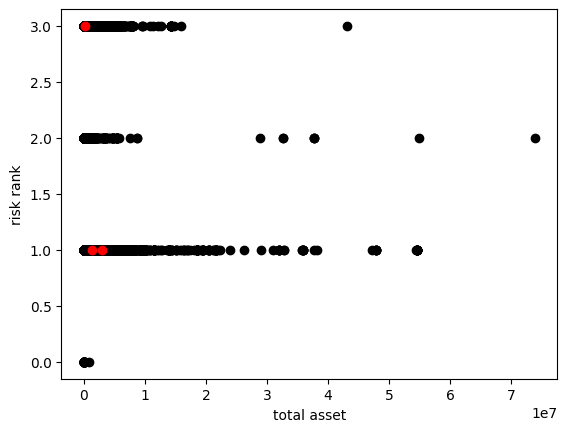

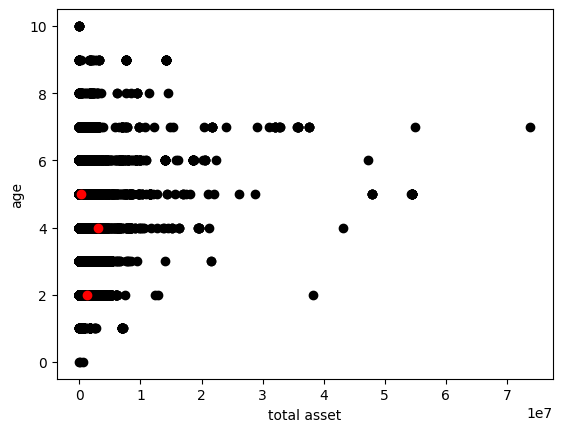

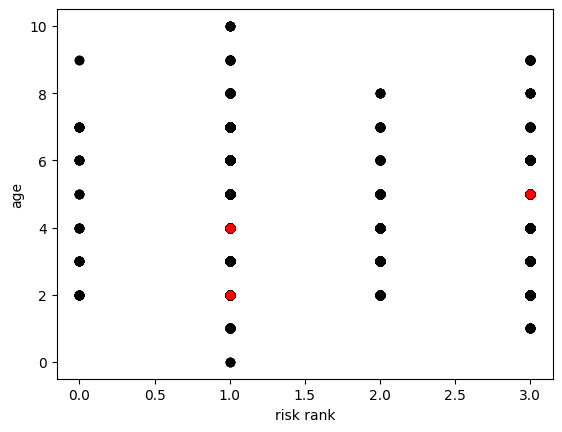

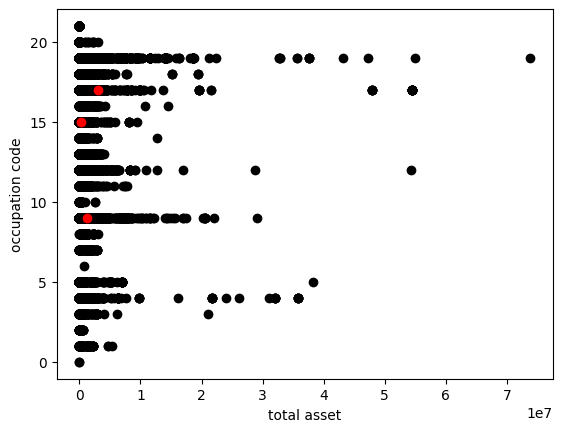

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
K=3
X = custinfo
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["total_asset"],X["risk_rank"],c='black')
plt.scatter(Centroids["total_asset"],Centroids["risk_rank"],c='red')
plt.xlabel('total asset')
plt.ylabel('risk rank')
plt.show()

plt.scatter(X["total_asset"],X["AGE"],c='black')
plt.scatter(Centroids["total_asset"],Centroids["AGE"],c='red')
plt.xlabel('total asset')
plt.ylabel('age')
plt.show()

plt.scatter(X["risk_rank"],X["AGE"],c='black')
plt.scatter(Centroids["risk_rank"],Centroids["AGE"],c='red')
plt.xlabel('risk rank')
plt.ylabel('age')
plt.show()

plt.scatter(X["total_asset"],X["occupation_code"],c='black')
plt.scatter(Centroids["total_asset"],Centroids["occupation_code"],c='red')
plt.xlabel('total asset')
plt.ylabel('occupation code')
plt.show()

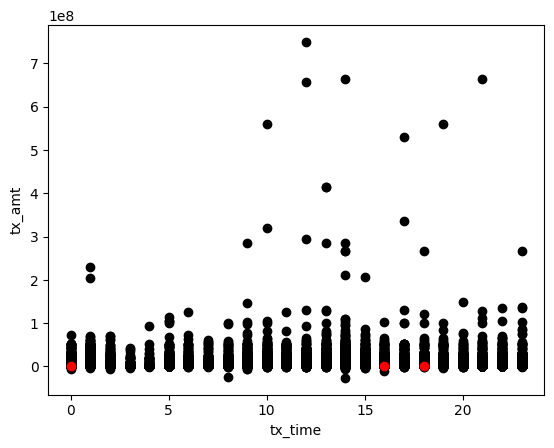

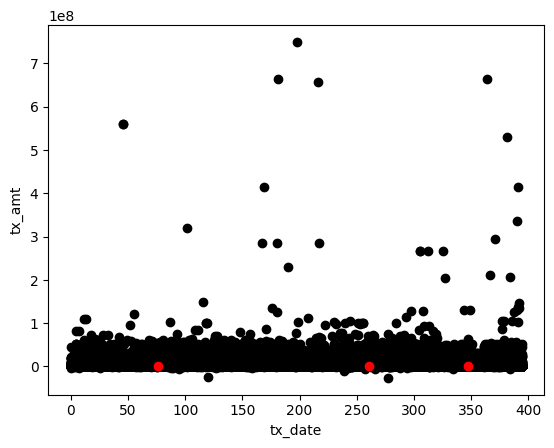

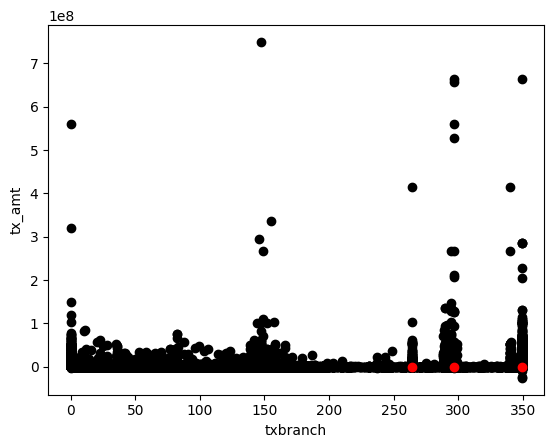

In [37]:
K=3
X = dp
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["tx_time"],X["tx_amt"],c='black')
plt.scatter(Centroids["tx_time"],Centroids["tx_amt"],c='red')
plt.xlabel('tx_time')
plt.ylabel('tx_amt')
plt.show()

plt.scatter(X["tx_date"],X["tx_amt"],c='black')
plt.scatter(Centroids["tx_date"],Centroids["tx_amt"],c='red')
plt.xlabel('tx_date')
plt.ylabel('tx_amt')
plt.show()

plt.scatter(X["txbranch"],X["tx_amt"],c='black')
plt.scatter(Centroids["txbranch"],Centroids["tx_amt"],c='red')
plt.xlabel('txbranch')
plt.ylabel('tx_amt')
plt.show()

In [39]:
print(remit)

                                                 cust_id  trans_date  \
0      01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         148   
1      01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         165   
2      01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         231   
3      01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         291   
4      01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         389   
...                                                  ...         ...   
17162  ff6c1217b5e039fda46bf4dfba2d54291154a1db54c677...         244   
17163  ff6c1217b5e039fda46bf4dfba2d54291154a1db54c677...         284   
17164  ff6c1217b5e039fda46bf4dfba2d54291154a1db54c677...         298   
17165  ff6c1217b5e039fda46bf4dfba2d54291154a1db54c677...         316   
17166  ff6c1217b5e039fda46bf4dfba2d54291154a1db54c677...         386   

       trans_no  trade_amount_usd data_source  
0             0          100528.0       remit  
1             0          100528.0      

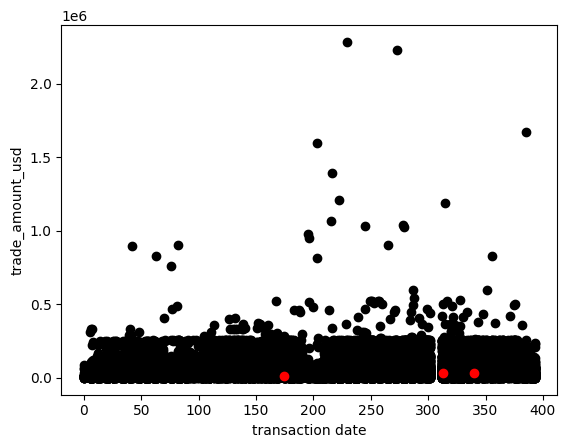

In [40]:
K=3
X = remit
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["trans_date"],X["trade_amount_usd"],c='black')
plt.scatter(Centroids["trans_date"],Centroids["trade_amount_usd"],c='red')
plt.xlabel('transaction date')
plt.ylabel('trade_amount_usd')
plt.show()